In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
sns.set_theme()


In [2]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('preprocessing.csv',index_col=0)
print(df.shape)
df.head()

(466246, 13)


,crime_type,crime_category,date,reported,y_lon,x_lat,neighborhood,dates,times,equity_score,pop_2010,crime_count,neighborhood_crime_rate
0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 20:36:00,-105.018825,39.714268,Valverde,2022-01-04,11:30:00,1.6,3941.0,1,822.633849
1,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,2022-01-03 21:12:00,-105.014892,39.711518,Valverde,2022-01-03,19:47:00,1.6,3941.0,1,822.633849
6,criminal-mischief-other,public-disorder,2019-06-19 16:30:00,2019-06-20 14:21:00,-105.014690,39.712854,Valverde,2019-06-19,16:30:00,1.6,3941.0,1,822.633849
7,criminal-mischief-other,public-disorder,2019-09-11 16:30:00,2019-09-13 14:55:00,-105.012846,39.711710,Valverde,2019-09-11,16:30:00,1.6,3941.0,1,822.633849
8,criminal-mischief-other,public-disorder,2021-11-08 02:42:00,2021-11-08 03:31:00,-105.024081,39.722317,Valverde,2021-11-08,02:42:00,1.6,3941.0,1,822.633849


In [4]:
df = df.iloc[:,[1,4,5,6,9]]
df.head()

,crime_category,y_lon,x_lat,neighborhood,equity_score
0,public-disorder,-105.018825,39.714268,Valverde,1.6
1,public-disorder,-105.014892,39.711518,Valverde,1.6
6,public-disorder,-105.014690,39.712854,Valverde,1.6
7,public-disorder,-105.012846,39.711710,Valverde,1.6
8,public-disorder,-105.024081,39.722317,Valverde,1.6


In [5]:
df.isnull().sum().sort_values(ascending=False)

crime_category    0
y_lon             0
x_lat             0
neighborhood      0
equity_score      0
dtype: int64

In [6]:
df.crime_category.value_counts()

traffic-accident                106846
all-other-crimes                 74413
theft-from-motor-vehicle         49760
public-disorder                  49619
larceny                          49587
auto-theft                       39854
burglary                         24244
drug-alcohol                     22630
other-crimes-against-persons     21996
aggravated-assault               13652
robbery                           6327
white-collar-crime                6217
arson                              720
murder                             381
Name: crime_category, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
y_lon,466246.0,-104.928508,1.793875,-115.46406,-105.004766,-104.980425,-104.916195,5.000000e-07
x_lat,466246.0,39.721679,0.679421,0.00000,39.707754,39.739852,39.760192,3.990431e+01
equity_score,466246.0,2.931285,0.801037,1.60000,2.300000,3.100000,3.600000,4.700000e+00


In [8]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,crime_category,y_lon,x_lat,neighborhood,equity_score
19,public-disorder,-105.012183,39.711534,Valverde,1.6
20,public-disorder,-105.012183,39.711534,Valverde,1.6
21,public-disorder,-105.012183,39.711534,Valverde,1.6
40,public-disorder,-105.024643,39.721718,Valverde,1.6
41,public-disorder,-105.015630,39.719839,Valverde,1.6
...,...,...,...,...,...
305545,murder,-104.923881,39.763476,Northeast Park Hill,2.1
305546,murder,-104.923881,39.763476,Northeast Park Hill,2.1
321366,murder,-104.809881,39.773188,Montbello,2.3
339206,murder,-104.861964,39.658404,Kennedy,2.8


In [9]:
df.shape

(466246, 5)

In [10]:
factors = ['y_lon', 'x_lat', 'neighborhood', 'equity_score']
y=df.crime_category
X=df[factors]
X=pd.get_dummies(X)

In [11]:
X.columns

Index(['y_lon', 'x_lat', 'equity_score', 'neighborhood_Athmar Park',
       'neighborhood_Auraria', 'neighborhood_Baker', 'neighborhood_Barnum',
       'neighborhood_Barnum West', 'neighborhood_Bear Valley',
       'neighborhood_Belcaro', 'neighborhood_Berkeley', 'neighborhood_CBD',
       'neighborhood_Capitol Hill', 'neighborhood_Central Park',
       'neighborhood_Chaffee Park', 'neighborhood_Cheesman Park',
       'neighborhood_Cherry Creek', 'neighborhood_City Park',
       'neighborhood_City Park West', 'neighborhood_Civic Center',
       'neighborhood_Clayton', 'neighborhood_Cole',
       'neighborhood_College View / South Platte',
       'neighborhood_Congress Park', 'neighborhood_Cory - Merrill',
       'neighborhood_Country Club', 'neighborhood_DIA',
       'neighborhood_East Colfax', 'neighborhood_Elyria Swansea',
       'neighborhood_Five Points', 'neighborhood_Fort Logan',
       'neighborhood_Gateway / Green Valley Ranch', 'neighborhood_Globeville',
       'neighborhood_G

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [13]:
#scale data
from sklearn import preprocessing
import numpy as np

# build scaler based on training data and apply it to test data to then also scale the test data

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=25, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)


In [15]:
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.386
Random Forest: f1-score=0.370


30


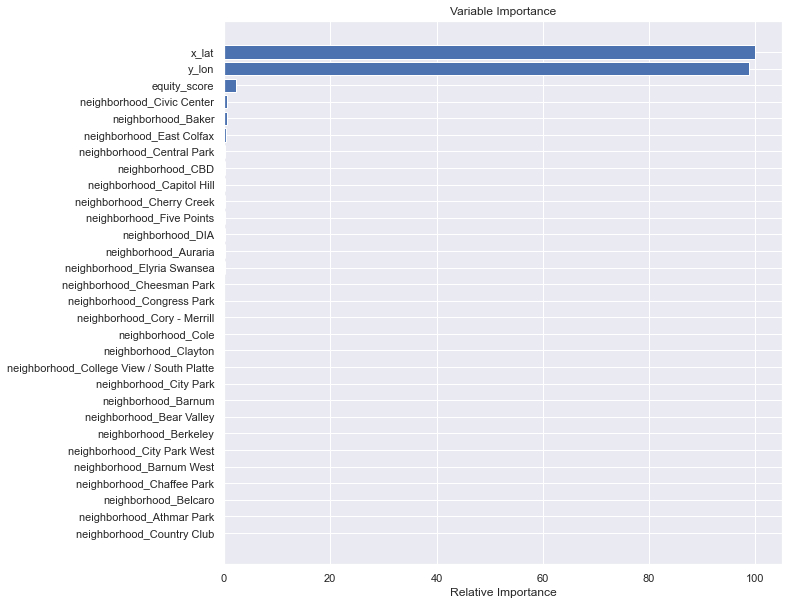

In [16]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [17]:
# Import xgboost
import xgboost as xgb

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


C:\Users\derek\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\derek\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:04:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.308268


# got Very Low Result Scores. Lets try adding some data. 

In [18]:
df = pd.read_csv('preprocessing.csv',index_col=0,parse_dates=['date','reported'])
print(df.shape)
df.head()

(466246, 13)


,crime_type,crime_category,date,reported,y_lon,x_lat,neighborhood,dates,times,equity_score,pop_2010,crime_count,neighborhood_crime_rate
0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 20:36:00,-105.018825,39.714268,Valverde,2022-01-04,11:30:00,1.6,3941.0,1,822.633849
1,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,2022-01-03 21:12:00,-105.014892,39.711518,Valverde,2022-01-03,19:47:00,1.6,3941.0,1,822.633849
6,criminal-mischief-other,public-disorder,2019-06-19 16:30:00,2019-06-20 14:21:00,-105.014690,39.712854,Valverde,2019-06-19,16:30:00,1.6,3941.0,1,822.633849
7,criminal-mischief-other,public-disorder,2019-09-11 16:30:00,2019-09-13 14:55:00,-105.012846,39.711710,Valverde,2019-09-11,16:30:00,1.6,3941.0,1,822.633849
8,criminal-mischief-other,public-disorder,2021-11-08 02:42:00,2021-11-08 03:31:00,-105.024081,39.722317,Valverde,2021-11-08,02:42:00,1.6,3941.0,1,822.633849


In [19]:
bins = [0,5,10,14,18,20,24]
categories = ['Early Morning','Morning','Midday','Afternoon','Evening','Night']
ToD = pd.cut(df['date'].dt.hour,bins = bins, labels = categories)
df.insert(4,'time_of_day',ToD)


DOW = df['date'].dt.day_name()
df.insert(5,'day_of_week',DOW)
weekend = df["date"].dt.weekday >= 5
df.insert(6,'IsWeekend',weekend)

In [20]:
df

,crime_type,crime_category,date,reported,time_of_day,day_of_week,IsWeekend,y_lon,x_lat,neighborhood,dates,times,equity_score,pop_2010,crime_count,neighborhood_crime_rate
0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 20:36:00,Midday,Tuesday,False,-105.018825,39.714268,Valverde,2022-01-04,11:30:00,1.6,3941.0,1,822.633849
1,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,2022-01-03 21:12:00,Evening,Monday,False,-105.014892,39.711518,Valverde,2022-01-03,19:47:00,1.6,3941.0,1,822.633849
6,criminal-mischief-other,public-disorder,2019-06-19 16:30:00,2019-06-20 14:21:00,Afternoon,Wednesday,False,-105.014690,39.712854,Valverde,2019-06-19,16:30:00,1.6,3941.0,1,822.633849
7,criminal-mischief-other,public-disorder,2019-09-11 16:30:00,2019-09-13 14:55:00,Afternoon,Wednesday,False,-105.012846,39.711710,Valverde,2019-09-11,16:30:00,1.6,3941.0,1,822.633849
8,criminal-mischief-other,public-disorder,2021-11-08 02:42:00,2021-11-08 03:31:00,Early Morning,Monday,False,-105.024081,39.722317,Valverde,2021-11-08,02:42:00,1.6,3941.0,1,822.633849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463385,homicide-family,murder,2020-02-09 20:10:00,2020-02-09 21:41:00,Evening,Sunday,True,-105.020804,39.786323,Chaffee Park,2020-02-09,20:10:00,3.1,3874.0,1,601.961797
465536,homicide-family,murder,2019-05-15 21:34:00,2019-05-15 21:34:00,Night,Wednesday,False,-104.949130,39.759391,Skyland,2019-05-15,21:34:00,2.6,3106.0,1,540.244688
465537,homicide-other,murder,2017-06-30 23:15:00,2017-07-01 02:23:00,Night,Friday,False,-104.959438,39.758050,Skyland,2017-06-30,23:15:00,2.6,3106.0,1,540.244688
465538,homicide-other,murder,2019-09-11 23:56:00,2019-09-12 02:51:00,Night,Wednesday,False,-104.946110,39.756261,Skyland,2019-09-11,23:56:00,2.6,3106.0,1,540.244688


In [21]:
df = df.iloc[:,[1,4,5,6,7,8,9,12]]
df.head()

,crime_category,time_of_day,day_of_week,IsWeekend,y_lon,x_lat,neighborhood,equity_score
0,public-disorder,Midday,Tuesday,False,-105.018825,39.714268,Valverde,1.6
1,public-disorder,Evening,Monday,False,-105.014892,39.711518,Valverde,1.6
6,public-disorder,Afternoon,Wednesday,False,-105.014690,39.712854,Valverde,1.6
7,public-disorder,Afternoon,Wednesday,False,-105.012846,39.711710,Valverde,1.6
8,public-disorder,Early Morning,Monday,False,-105.024081,39.722317,Valverde,1.6


In [22]:
y=df.crime_category
X=df.iloc[:,1:]
X=pd.get_dummies(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [24]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)


In [26]:
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.320
Random Forest: f1-score=0.312


30


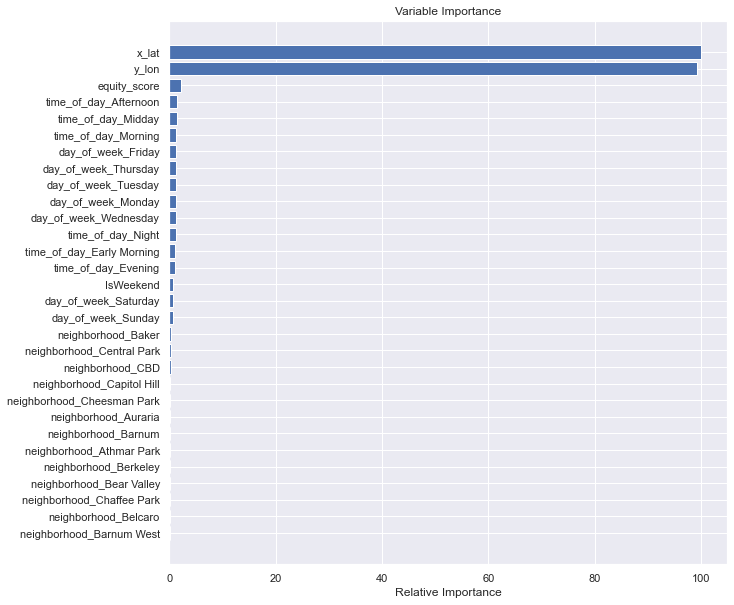

In [27]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [28]:
# Import xgboost
import xgboost as xgb

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\derek\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:05:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.320976


30


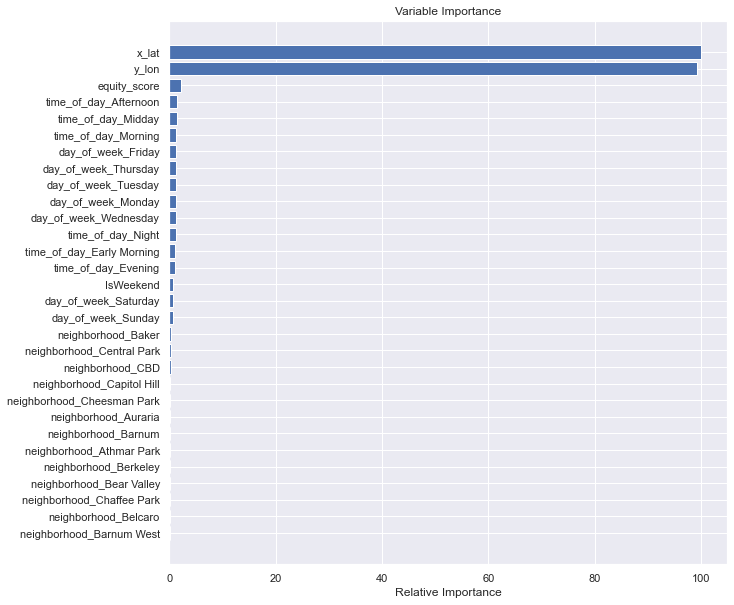

In [29]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [30]:
df.head()

,crime_category,time_of_day,day_of_week,IsWeekend,y_lon,x_lat,neighborhood,equity_score
0,public-disorder,Midday,Tuesday,False,-105.018825,39.714268,Valverde,1.6
1,public-disorder,Evening,Monday,False,-105.014892,39.711518,Valverde,1.6
6,public-disorder,Afternoon,Wednesday,False,-105.014690,39.712854,Valverde,1.6
7,public-disorder,Afternoon,Wednesday,False,-105.012846,39.711710,Valverde,1.6
8,public-disorder,Early Morning,Monday,False,-105.024081,39.722317,Valverde,1.6


# Removing Lat and Long

In [31]:
y=df.crime_category
X=df.iloc[:,[1,2,3,6,7]]
X=pd.get_dummies(X)

In [32]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [33]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)


In [35]:
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.278
Random Forest: f1-score=0.216


30


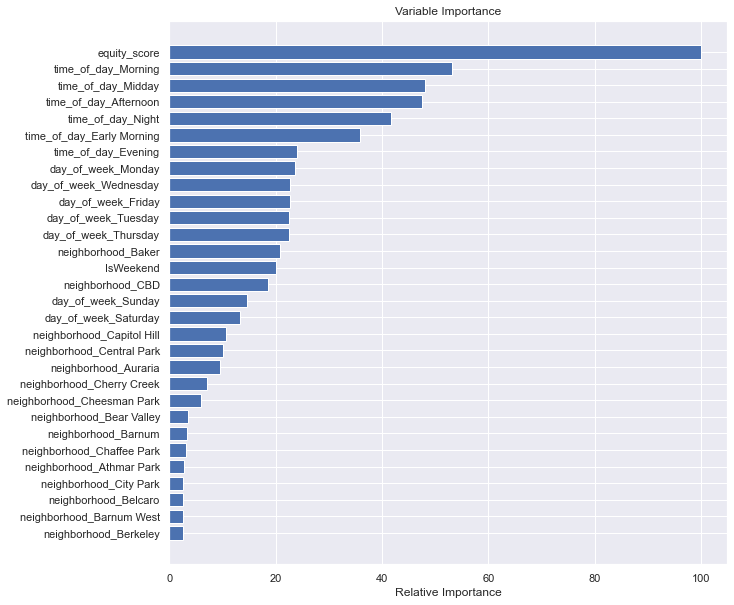

In [36]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [37]:
# Import xgboost
import xgboost as xgb

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\derek\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:06:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.278188


30


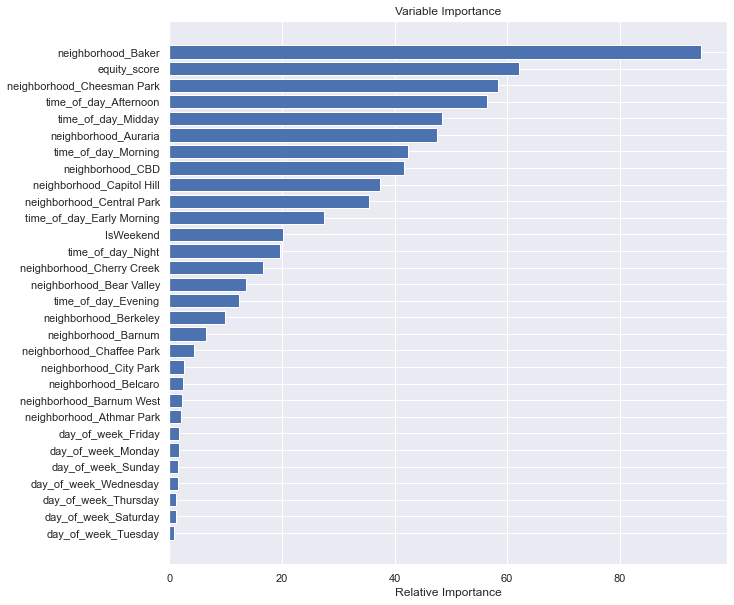

In [38]:
feature_importance = xg_cl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [39]:
df.head()

,crime_category,time_of_day,day_of_week,IsWeekend,y_lon,x_lat,neighborhood,equity_score
0,public-disorder,Midday,Tuesday,False,-105.018825,39.714268,Valverde,1.6
1,public-disorder,Evening,Monday,False,-105.014892,39.711518,Valverde,1.6
6,public-disorder,Afternoon,Wednesday,False,-105.014690,39.712854,Valverde,1.6
7,public-disorder,Afternoon,Wednesday,False,-105.012846,39.711710,Valverde,1.6
8,public-disorder,Early Morning,Monday,False,-105.024081,39.722317,Valverde,1.6


# Now Lets simplify further

In [40]:
y=df.crime_category
X=df.iloc[:,[1,6,7]]
print(X)
X=pd.get_dummies(X)

          time_of_day  neighborhood  equity_score
0              Midday      Valverde           1.6
1             Evening      Valverde           1.6
6           Afternoon      Valverde           1.6
7           Afternoon      Valverde           1.6
8       Early Morning      Valverde           1.6
...               ...           ...           ...
463385        Evening  Chaffee Park           3.1
465536          Night       Skyland           2.6
465537          Night       Skyland           2.6
465538          Night       Skyland           2.6
465539         Midday       Skyland           2.6

[466246 rows x 3 columns]


In [41]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [42]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)


In [44]:
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.281
Random Forest: f1-score=0.208


30


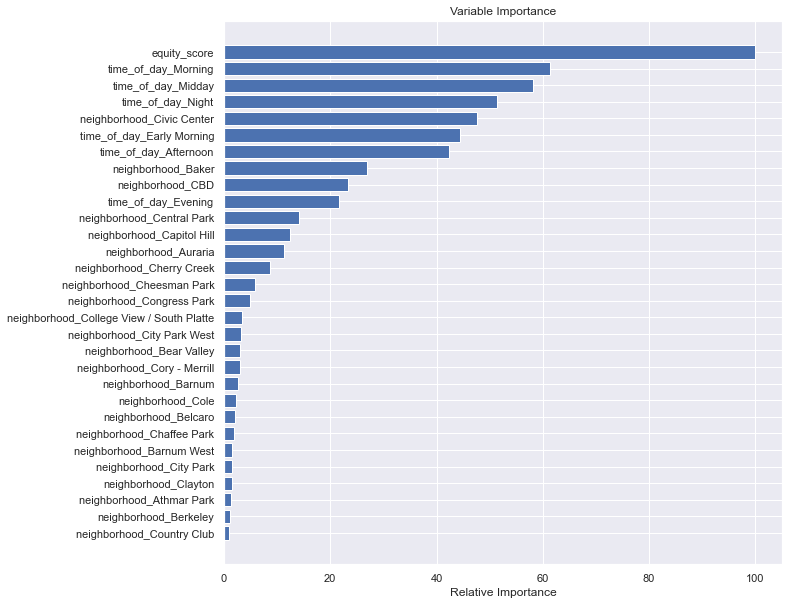

In [45]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [46]:
# Import xgboost
import xgboost as xgb

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\derek\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:08:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.277737


30


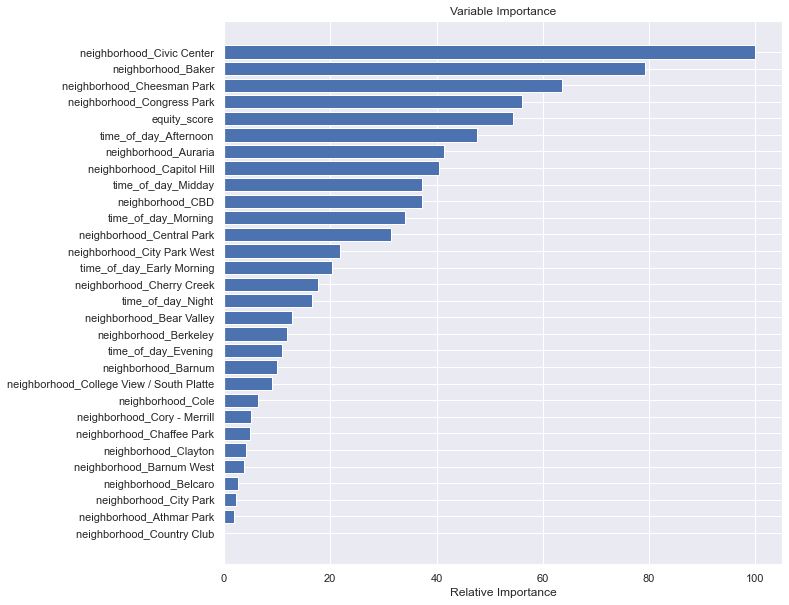

In [47]:

feature_importance = xg_cl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [48]:
df = pd.read_csv('preprocessing.csv',index_col=0,parse_dates=['date','reported'])

In [49]:
bins = [0,5,10,14,18,20,24]
categories = ['Early Morning','Morning','Midday','Afternoon','Evening','Night']
ToD = pd.cut(df['date'].dt.hour,bins = bins, labels = categories)
df.insert(4,'time_of_day',ToD)


DOW = df['date'].dt.day_name()
df.insert(5,'day_of_week',DOW)
weekend = df["date"].dt.weekday >= 5
df.insert(6,'IsWeekend',weekend)

In [50]:
df = df.iloc[:,[1,4,5,6,7,8,9,12]]
df.head()

,crime_category,time_of_day,day_of_week,IsWeekend,y_lon,x_lat,neighborhood,equity_score
0,public-disorder,Midday,Tuesday,False,-105.018825,39.714268,Valverde,1.6
1,public-disorder,Evening,Monday,False,-105.014892,39.711518,Valverde,1.6
6,public-disorder,Afternoon,Wednesday,False,-105.014690,39.712854,Valverde,1.6
7,public-disorder,Afternoon,Wednesday,False,-105.012846,39.711710,Valverde,1.6
8,public-disorder,Early Morning,Monday,False,-105.024081,39.722317,Valverde,1.6


In [51]:
y=df.crime_category
X=df.iloc[:,[1,6,7]]
X=pd.get_dummies(X)

In [52]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [53]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [58]:
model = LogisticRegression().fit(X_train,y_train)
print(model.score(X_test,y_test))
print(confusion_matrix(y_test,model.predict(X_test)))

C:\Users\derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.27909919571045577
[[    0  1273     0   113     4     0    86     0     0    19     0   144
   1110     0]
 [    0  6937     0   398    37     0   707     0     0    35     0   666
   6034     0]
 [    0    66     0     8     0     0     6     0     0     1     0     4
     63     0]
 [    0  2215     0   680    21     0   255     0     0    35     0   741
   4140     0]
 [    0  1321     0   161    37     0   162     0     0    24     0   511
   2682     0]
 [    0  1607     0    83     4     0   264     0     0     7     0   114
   2439     0]
 [    0  1941     0   236    25     0  1130     0     0    32     0   491
   6090     0]
 [    0    52     0     3     0     0     1     0     0     2     0     5
     34     0]
 [    0  1705     0   178     5     0   223     0     0    20     0   243
   2072     0]
 [    0  3354     0   445    34     0   467     0     0    65     0   783
   4777     0]
 [    0   515     0    60     3     0    65     0     0     5     0    80
    560     0]
 

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision : ', precision_score(y_test, model.predict(X_test),average=None))

Precision :  [0.         0.25452211 0.         0.20826953 0.15611814 0.
 0.24906326 0.         0.         0.19578313 0.         0.21267208
 0.30740213 0.        ]


C:\Users\derek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
model = RandomForestClassifier(random_state=42).fit(X_train,y_train)
print(model.score(X_test,y_test))
confusion_matrix(y_test,model.predict(X_test))

0.2811581769436997


array([[    0,  1218,     0,   137,     4,    30,   105,     0,     0,
           55,     0,   171,  1029,     0],
       [    0,  6930,     0,   434,    22,   177,   772,     0,     0,
          174,     0,   807,  5498,     0],
       [    0,    68,     0,    10,     0,     0,     5,     0,     0,
            2,     0,     6,    57,     0],
       [    0,  2132,     0,   747,    11,    74,   277,     0,     0,
           86,     0,   876,  3884,     0],
       [    0,  1272,     0,   187,    37,    35,   168,     0,     0,
           75,     0,   596,  2528,     0],
       [    0,  1650,     0,    77,     5,   276,   289,     0,     0,
           31,     0,   144,  2046,     0],
       [    0,  1854,     0,   257,    18,   121,  1296,     0,     0,
          105,     0,   570,  5724,     0],
       [    0,    52,     0,     3,     0,     0,     3,     0,     0,
            1,     0,    10,    28,     0],
       [    0,  1661,     0,   184,     3,    46,   246,     0,     0,
         

30


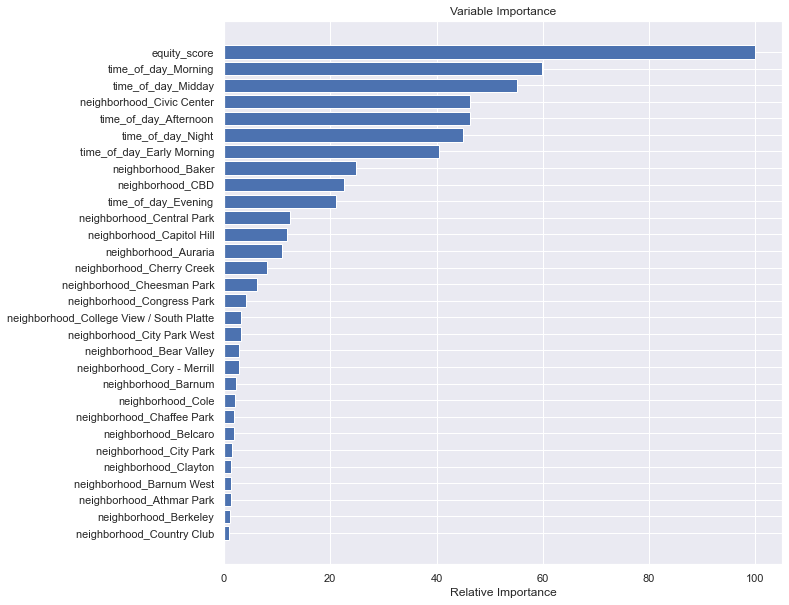

In [57]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [66]:
y_test.unique()

array(['larceny', 'drug-alcohol', 'auto-theft',
       'other-crimes-against-persons', 'all-other-crimes',
       'traffic-accident', 'theft-from-motor-vehicle', 'public-disorder',
       'robbery', 'burglary', 'aggravated-assault', 'white-collar-crime',
       'arson', 'murder'], dtype=object)

# Combine Crime Types to make predictions easier

In [103]:
df.crime_category.unique()

array(['drug_and_disorder', 'all_other', 'traffic', 'theft', 'violent'],
      dtype=object)

In [98]:
theft = ['larceny','auto-theft','theft-from-motor-vehicle','robbery', 'burglary']
violent = ['aggravated-assault','arson','murder','other-crimes-against-persons']
all_other_crimes = ['all-other-crimes','white-collar-crime']
traffic = ['traffic-accident']
drug_and_disorder = ['public-disorder', 'drug-alcohol']

In [99]:
for x in theft:
    df.loc[ df['crime_category'] == x, 'crime_category'] = 'theft'
    
for x in violent:
    df.loc[ df['crime_category'] == x, 'crime_category'] = 'violent'
    
for x in all_other_crimes:
    df.loc[ df['crime_category'] == x, 'crime_category'] = 'all_other'
    
for x in traffic:
    df.loc[ df['crime_category'] == x, 'crime_category'] = 'traffic'
    
for x in drug_and_disorder:
    df.loc[ df['crime_category'] == x, 'crime_category'] = 'drug_and_disorder'

In [100]:
print(df.crime_category.nunique())
df.crime_category.unique()

5


array(['drug_and_disorder', 'all_other', 'traffic', 'theft', 'violent'],
      dtype=object)

In [102]:
df.crime_category.value_counts(normalize=True)

theft                0.364125
traffic              0.229162
all_other            0.172934
drug_and_disorder    0.154959
violent              0.078819
Name: crime_category, dtype: float64

In [115]:
y=df.crime_category
X=df.iloc[:,1:]
X=pd.get_dummies(X)

In [116]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [117]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [118]:
model = LogisticRegression().fit(X_train_scaled,y_train)
print(model.score(X_test_scaled,y_test))
print(confusion_matrix(y_test,model.predict(X_test_scaled)))

C:\Users\derek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.397201072386059
[[ 2869     0 10924  2271     0]
 [ 1458     0 11132  1853     0]
 [ 1728     0 27624  4529     0]
 [ 1131     0 13745  6546     0]
 [  891     0  5714   835     0]]


In [119]:
model = RandomForestClassifier(random_state=42).fit(X_train_scaled,y_train)
print(model.score(X_test_scaled,y_test))
confusion_matrix(y_test,model.predict(X_test_scaled))

0.4701769436997319


array([[ 5521,  2311,  4406,  2727,  1099],
       [ 2718,  3384,  5531,  1619,  1191],
       [ 3340,  3712, 21640,  3534,  1655],
       [ 2426,  1324,  4765, 12290,   617],
       [ 1357,  1422,  2813,   839,  1009]], dtype=int64)

30


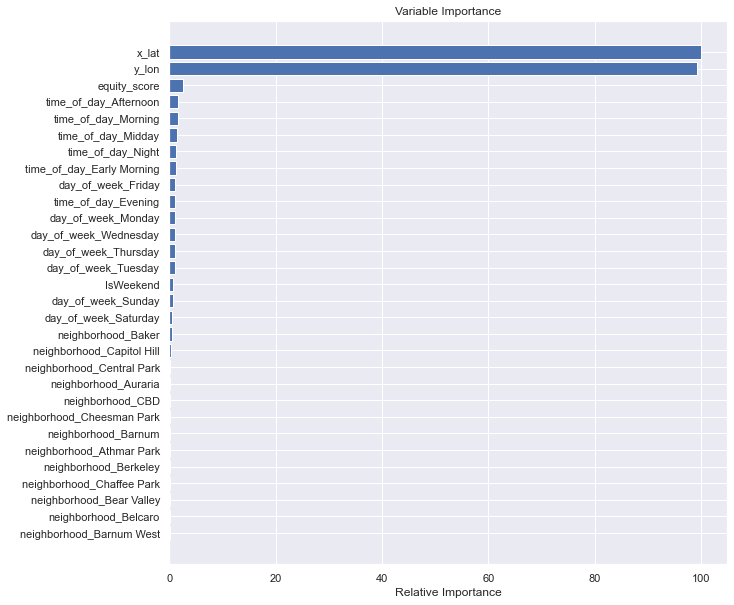

In [120]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [122]:
df.columns


Index(['crime_category', 'time_of_day', 'day_of_week', 'IsWeekend', 'y_lon',
       'x_lat', 'neighborhood', 'equity_score'],
      dtype='object')

In [125]:
y=df.crime_category
X=df.loc[:,['time_of_day', 'day_of_week', 'IsWeekend','neighborhood', 'equity_score']]
X=pd.get_dummies(X)

In [126]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [127]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [128]:
model = LogisticRegression().fit(X_train_scaled,y_train)
print(model.score(X_test_scaled,y_test))
print(confusion_matrix(y_test,model.predict(X_test_scaled)))

0.3945201072386059
[[ 3056     0 10909  2099     0]
 [ 1563     0 11099  1781     0]
 [ 1952     0 27640  4289     0]
 [ 1253     0 14076  6093     0]
 [  947     0  5669   824     0]]


In [129]:
model = RandomForestClassifier(random_state=42).fit(X_train_scaled,y_train)
print(model.score(X_test_scaled,y_test))
confusion_matrix(y_test,model.predict(X_test_scaled))

0.39639678284182306


array([[ 3429,   506,  9785,  2273,    71],
       [ 1714,   814,  9724,  2147,    44],
       [ 2263,   709, 25359,  5495,    55],
       [ 1510,   424, 12148,  7297,    43],
       [ 1045,   227,  5103,  1000,    65]], dtype=int64)

30


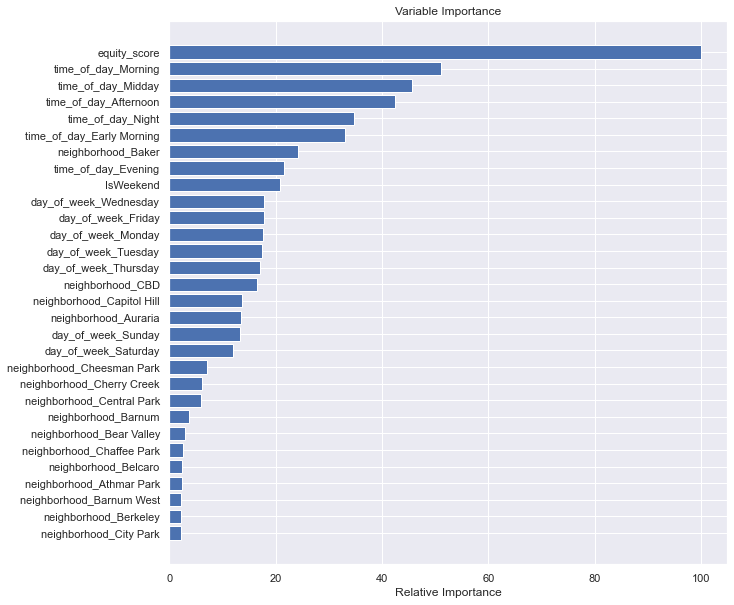

In [130]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()